# Demonstration of code completion model finetuning and evaluation

## Preparation

In [27]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import Dataset, load_dataset
import seaborn as sns
import matplotlib.pyplot as plt

from finetune import validate_hyperparameters, finetune
from evaluate import evaluate_code_completion, complete

import numpy as np
from scipy.stats import ttest_rel

In [2]:
model_name = "Salesforce/codegen-350M-mono"
train_dataset_name = "./data/kotlin-code-exercises-10000"
eval_dataset_name = "JetBrains/Kotlin_HumanEval"

dataset = Dataset.load_from_disk(train_dataset_name)
split_dataset = dataset.train_test_split(test_size=0.1)

## Validation

In [4]:
hyperparams_to_try = {
    "effective_batch_size": [4, 8, 16, 32],
    "learning_rate": [1e-4, 4e-5, 1e-5, 4e-6],
}

best_combination, best_loss, losses_df = validate_hyperparameters(model_name, split_dataset, hyperparams_to_try)

  0%|          | 0/16 [00:00<?, ?it/s]

Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.871200,0.822648
2,0.367500,0.783518
3,0.432600,0.831544
4,0.250000,0.903333


  6%|▋         | 1/16 [24:26<6:06:32, 1466.14s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 0.0001}: 0.7835177183151245
Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.695400,0.631472
2,0.285200,0.623039
3,0.352700,0.693867
4,0.174400,0.799742


 12%|█▎        | 2/16 [50:04<5:52:03, 1508.79s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 4e-05}: 0.6230393052101135
Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.630600,0.541074
2,0.240800,0.541126
3,0.217500,0.637523


 19%|█▉        | 3/16 [1:09:46<4:54:35, 1359.64s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 1e-05}: 0.5410741567611694
Testing hyperparameter combination: {'effective_batch_size': 4, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.639000,0.551574
2,0.261600,0.532196
3,0.304100,0.566663
4,0.216400,0.643941


 25%|██▌       | 4/16 [1:36:13<4:49:50, 1449.22s/it]

Validation loss for combination {'effective_batch_size': 4, 'learning_rate': 4e-06}: 0.532195508480072
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,1.029200,0.729463
2,0.382100,0.707042
3,0.290700,0.778721
4,0.222700,0.849150


 31%|███▏      | 5/16 [1:55:39<4:06:57, 1347.08s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 0.0001}: 0.7070417404174805
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.844300,0.589612
2,0.300600,0.600106
3,0.208900,0.691659


 38%|███▊      | 6/16 [2:10:14<3:17:46, 1186.68s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 4e-05}: 0.5896124243736267
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.752200,0.538862
2,0.277200,0.532814
3,0.216300,0.605358
4,0.141700,0.726939


 44%|████▍     | 7/16 [2:29:48<2:57:21, 1182.44s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 1e-05}: 0.5328137874603271
Testing hyperparameter combination: {'effective_batch_size': 8, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
1,0.768100,0.563852
2,0.309200,0.537013
3,0.351800,0.552336
4,0.228600,0.602732


 50%|█████     | 8/16 [2:49:20<2:37:13, 1179.25s/it]

Validation loss for combination {'effective_batch_size': 8, 'learning_rate': 4e-06}: 0.5370132923126221
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.897200,0.654399
2,0.214500,0.721838


 56%|█████▋    | 9/16 [3:02:58<2:04:24, 1066.30s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 0.0001}: 0.6543988585472107
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.811000,0.561485
2,0.186300,0.651396


 62%|██████▎   | 10/16 [3:16:47<1:39:17, 992.86s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 4e-05}: 0.5614851713180542
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.803300,0.544841
2,0.239100,0.581685
4,0.180300,0.670694


 69%|██████▉   | 11/16 [3:35:10<1:25:33, 1026.79s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 1e-05}: 0.5292479395866394
Testing hyperparameter combination: {'effective_batch_size': 16, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.849900,0.583397
2,0.336700,0.547643
4,0.190500,0.616541


 75%|███████▌  | 12/16 [3:57:37<1:14:56, 1124.12s/it]

Validation loss for combination {'effective_batch_size': 16, 'learning_rate': 4e-06}: 0.54764324426651
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 0.0001}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.696700,0.603650
1,0.432600,0.613719
2,0.275600,0.689690


 81%|████████▏ | 13/16 [4:10:38<51:00, 1020.24s/it]  

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 0.0001}: 0.6036495566368103
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 4e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.645000,0.547579
1,0.401800,0.550425
2,0.227500,0.641634


 88%|████████▊ | 14/16 [4:23:59<31:47, 953.98s/it] 

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 4e-05}: 0.5475791096687317
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 1e-05}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.656400,0.556717
1,0.478900,0.534213
2,0.366800,0.557567
4,0.280600,0.624207


 94%|█████████▍| 15/16 [4:41:36<16:24, 984.95s/it]

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 1e-05}: 0.5342133641242981
Testing hyperparameter combination: {'effective_batch_size': 32, 'learning_rate': 4e-06}


Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.710200,0.607453
1,0.558500,0.564926
2,0.482800,0.554096
4,0.370000,0.577833


100%|██████████| 16/16 [5:03:25<00:00, 1137.85s/it]

Validation loss for combination {'effective_batch_size': 32, 'learning_rate': 4e-06}: 0.5540964603424072
Best combination: {'effective_batch_size': 16, 'learning_rate': 1e-05} with validation loss: 0.5292479395866394


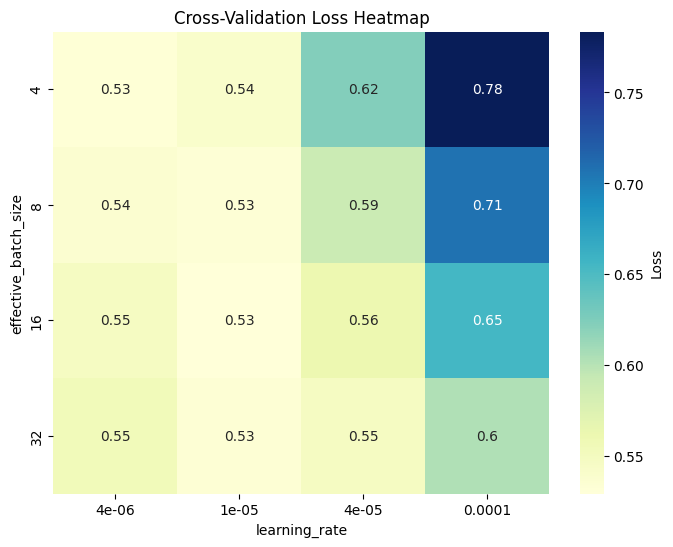

In [5]:
name1, name2 = hyperparams_to_try.keys()
pivot_losses_df = losses_df.pivot(index=name1, columns=name2, values="val_loss")


plt.figure(figsize=(8, 6))
sns.heatmap(pivot_losses_df, annot=True, cmap="YlGnBu", cbar_kws={'label': 'Loss'})
plt.title("Cross-Validation Loss Heatmap")
plt.xlabel(name2)
plt.ylabel(name1)
plt.show()

## Finetuning

In [3]:
# or you could run the validation pipeline
best_combination = {
    "effective_batch_size": 16,
    "learning_rate": 1e-5,
}

In [4]:
raw_model = AutoModelForCausalLM.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)

finetuned_model, _ = finetune(raw_model, tokenizer, split_dataset, **best_combination)

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

Epoch,Training Loss,Validation Loss
0,0.427100,0.549762
2,0.262700,0.590728
4,0.185300,0.676554


## Evaluation

In [3]:
raw_model = AutoModelForCausalLM.from_pretrained(model_name)
finetuned_model = AutoModelForCausalLM.from_pretrained("checkpoints/checkpoint-1962")

tokenizer = AutoTokenizer.from_pretrained(model_name)

eval_dataset = load_dataset(eval_dataset_name)["train"]

Some weights of the model checkpoint at Salesforce/codegen-350M-mono were not used when initializing CodeGenForCausalLM: ['transformer.h.0.attn.causal_mask', 'transformer.h.1.attn.causal_mask', 'transformer.h.10.attn.causal_mask', 'transformer.h.11.attn.causal_mask', 'transformer.h.12.attn.causal_mask', 'transformer.h.13.attn.causal_mask', 'transformer.h.14.attn.causal_mask', 'transformer.h.15.attn.causal_mask', 'transformer.h.16.attn.causal_mask', 'transformer.h.17.attn.causal_mask', 'transformer.h.18.attn.causal_mask', 'transformer.h.19.attn.causal_mask', 'transformer.h.2.attn.causal_mask', 'transformer.h.3.attn.causal_mask', 'transformer.h.4.attn.causal_mask', 'transformer.h.5.attn.causal_mask', 'transformer.h.6.attn.causal_mask', 'transformer.h.7.attn.causal_mask', 'transformer.h.8.attn.causal_mask', 'transformer.h.9.attn.causal_mask']
- This IS expected if you are initializing CodeGenForCausalLM from the checkpoint of a model trained on another task or with another architecture (e

In [4]:
raw_eval = evaluate_code_completion(eval_dataset, raw_model.cuda(), tokenizer)
finetuned_eval = evaluate_code_completion(eval_dataset, finetuned_model.cuda(), tokenizer)

100%|██████████| 161/161 [15:49<00:00,  5.90s/it]


In [5]:
print("Raw model evaluation metrics")
for key, val in raw_eval.items():
    if key == "ice-scores":
        key = "avg ice score"
        val = np.mean(val)
    print(f"{key}: {val}")

print()
print("Finetuned model evaluation metrics")
for key, val in finetuned_eval.items():
    if key == "ice-scores":
        key = "avg ice score"
        val = np.mean(val)
    print(f"{key}: {val}")

Raw model evaluation metrics
bleu-score: 1.802821249600914e-05
chrf-score: 18.752681745512664
avg ice score: 0.5093167701863354

Finetuned model evaluation metrics
bleu-score: 1.5350924498754858e-05
chrf-score: 24.46430230776065
avg ice score: 1.236024844720497


## Statistical analysis of ICE Scores

/home/coder/tmp/ipykernel_177488/848325734.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


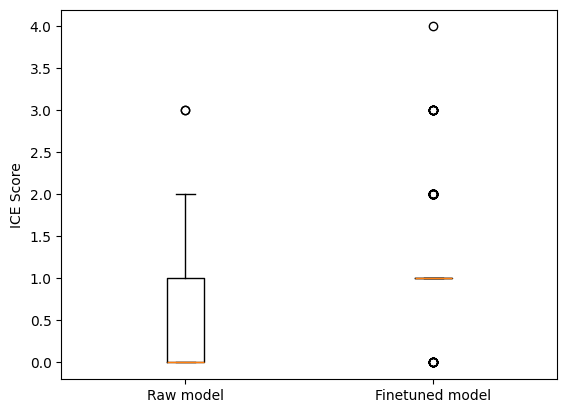

In [24]:
plt.boxplot(
    [raw_eval["ice-scores"], finetuned_eval["ice-scores"]],
    labels=["Raw model", "Finetuned model"],
)

plt.ylabel("ICE Score")

plt.savefig("ice-score-box.png")
plt.show()

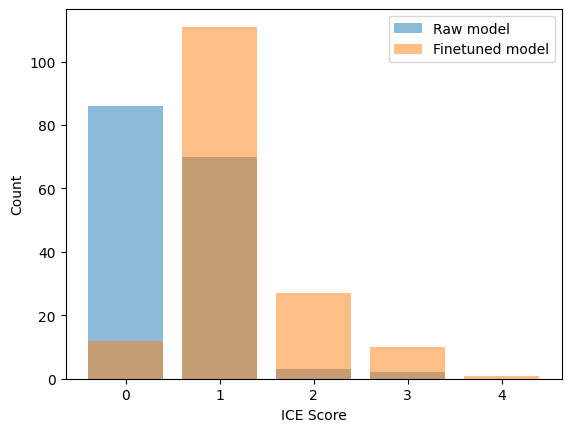

In [25]:
plt.bar(*np.unique(raw_eval["ice-scores"], return_counts=True),
    alpha=0.5, label="Raw model")
plt.bar(*np.unique(finetuned_eval["ice-scores"], return_counts=True),
    alpha=0.5, label="Finetuned model")


plt.xlabel("ICE Score")
plt.ylabel("Count")
plt.legend()

plt.savefig("ice-score-hist.png")
plt.show()

In [29]:
t_statistic, p_value = ttest_rel(raw_eval["ice-scores"], finetuned_eval["ice-scores"], alternative="less")

print("Independent t-test results:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

Independent t-test results:
t-statistic: -10.560809901447843
p-value: 2.0497511444244875e-20
